In [1]:
import os
import sys
import importlib
import numpy as np
import seaborn as sns
import pandas as pd
from IPython.display import Image, HTML, display
sys.path.insert(0, os.path.abspath('../'))
imagePath = os.path.abspath('../')+'/img/shakespeare.jpg'
from Kernel.SubsequenceStringKernel import SubsequenceStringKernel
import Util.Util as Util
import Constant as C
import Util.MetricsUtil as metric
from Model.SVMModel import SVMModel
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator

In [2]:
experimentNo=6
experimentname="experiment"+str(experimentNo)
case_name = C.Experiments[experimentname]
purpose="test"
m_lambda = C.m_lambda
n = C.N

In [3]:
x_test = Util.get_data_x(case_name, purpose)
x, y1 = Util.get_data(case_name, "input")
clf = Util.read_model(case_name, m_lambda, n)
ssk = SubsequenceStringKernel(n, m_lambda, x[clf.support_], x_test)
k = ssk.get_kernel(case_name, clf.support_)
svm = SVMModel(case_name)
decision_score = svm.decision_function_local(k)
y_predict = svm.prediction_local(k)
status = Util.get_status(case_name, y_predict)
htmltext=[]
for i in range(len(y_predict)):
    class_number = 0 if y_predict[i] == -1 else 1
    htmltext.append("<tr><td><img width='300' height='300' src=../img/"+C.images[experimentname][class_number]+"></td><td><h2>"+x_test[i][0]+"</h2></td></tr>")
display(HTML("<table>"+"".join(htmltext)+"</table>"))

,"Georgia won’t let us look at the all important signature match. Without that the recount is MEANINGLESS. Open up unconstitutional Consent Decree, NOW! @BrianKempGA"
,"I am the president-elect, but will not be president until next year. COVID-19 does not respect dates on the calendar, it is accelerating right now. Urgent action is needed today, now, by the current administration."


In [4]:
def get_decision_graph():
    frames=[]
    frames.append(pd.DataFrame({'testing': [0]*len(decision_score), 'distance': decision_score}))
    fig, ax = plt.subplots()
    annot = ax.annotate(C.cases[case_name][1], xy=(0,0.1), 
                        xytext=(20,20),textcoords="offset points",horizontalalignment='left',
                    bbox=dict(boxstyle="round", fc="w"))
    ax.annotate(C.cases[case_name][0], xy=(0,-0.2), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),horizontalalignment='left', verticalalignment='top')
    sc = sns.scatterplot(data=pd.concat(frames), x="testing", y="distance")
    point1 = [-1, 0]
    point2 = [1, 0]
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, 'k--')

<IPython.core.display.Javascript object>


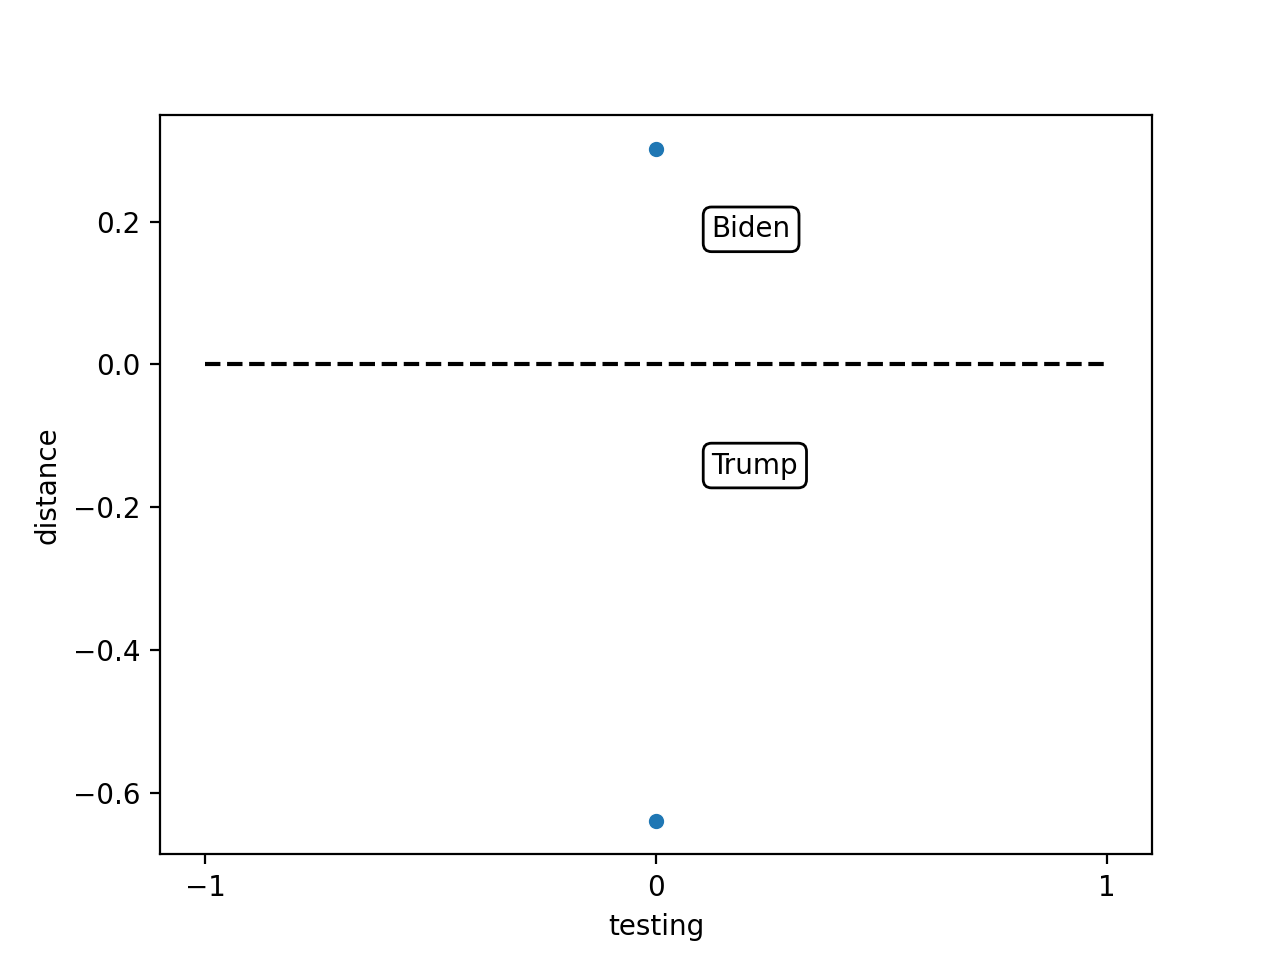

In [5]:
get_decision_graph()